In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
##############################################
# Modules corresponding to Elijahs Tutorial #
#############################################
#%matplotlib inline
from __future__ import division
import matplotlib
import numpy as np
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import h5py
import os
import re
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4)})
plotStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
np.seterr(divide='ignore',invalid='ignore')
from matplotlib import pyplot
from matplotlib.colors import LogNorm
pass

In [3]:
#!pip install statsmodels

In [4]:
#print('ready')

In [5]:
from __future__ import division
import h5py
import matplotlib
import math
import numpy as np
import os
import re
from pylab import *
#import statsmodels
#from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import acf
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.ticker import StrMethodFormatter
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#from uncertainties import ufloat
import matplotlib
import matplotlib.pyplot as plt
from pandas import DataFrame
from pylab import *
np.seterr(divide='ignore',invalid='ignore')
pass

In [6]:
%pwd

'/home/bciezah1/Documents/scripts/scripts-05-19-2021/scripts'

In [11]:
def screen_style(fontSize=20):
    global plotStyles,stepStyles,plotColors,plotSymbols
    matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'sans-serif','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
    plotStyles={"markersize":12,"markeredgewidth":3.0,"linewidth":3.0}
    stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
    plotColors=plt.rcParams['axes.prop_cycle'].by_key()['color']
    plotSymbols=['x','o','^']

screen_style()

# Panel a) and b)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


/media/bciezah1/BCH_USB_2/paper/figures/fig3/fig3ab/data/k1_3.393e-03_and_k3_1.207e-02_100x100_nuc_prod.lm
ready


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


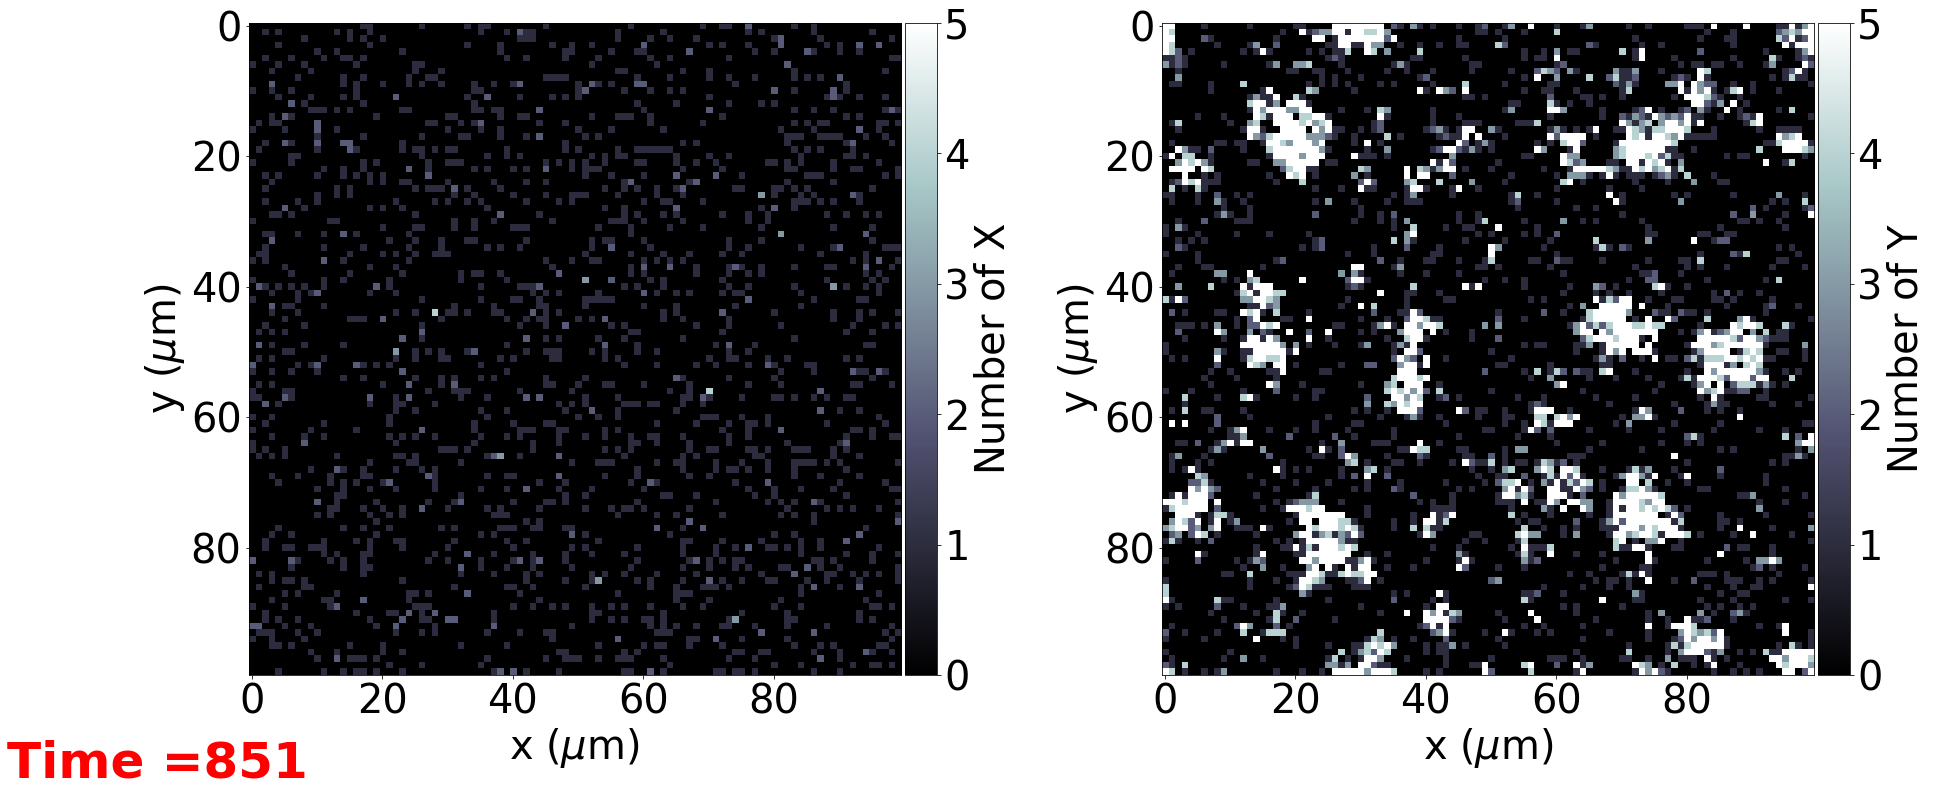

In [12]:
dir ='/media/bciezah1/BCH_USB_2/paper/figures/fig3/fig3ab/data/'
filename1 = dir+"k1_3.393e-03_and_k3_1.207e-02_100x100_nuc_prod.lm"
print(filename1)
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
for replicate in range(1,2):
    for lattice in lattices:
        if  250 < int(lattice) < 252:
            lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
            fig = plt.figure(figsize=(30,12))
            ax1 = plt.subplot(1,2,1)
            SumParticlesX2=np.sum(lfull==0,axis=3)
            TransPotSumPartX2=SumParticlesX2.transpose(2,0,1)
            m = ax1.imshow(TransPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone)
            plt.ylabel("y ($\mu$m)",fontsize=40); plt.xlabel("x ($\mu$m)",fontsize=40)
            plt.xticks(fontsize=40);plt.yticks(fontsize=40)
            divider = make_axes_locatable(ax1)
            cax = divider.append_axes("right",size='5%',pad=0.05)
            plt.colorbar(m,cax=cax)
            plt.yticks(fontsize=40)
            plt.ylabel('Number of $\mathregular{X}$',fontsize=40)
            ax1 = plt.subplot(1,2,2)
            SumParticlesX2=np.sum(lfull==1,axis=3)
            TransPotSumPartX2=SumParticlesX2.transpose(2,0,1)
            m = ax1.imshow(TransPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone)
            plt.ylabel("y ($\mu$m)",fontsize=40); plt.xlabel("x ($\mu$m)",fontsize=40)
            plt.xticks(fontsize=40);plt.yticks(fontsize=40)
            divider = make_axes_locatable(ax1)
            cax = divider.append_axes("right",size='5%',pad=0.05)
            plt.colorbar(m,cax=cax)
            plt.yticks(fontsize=40)
            plt.ylabel('Number of $\mathregular{Y}$',fontsize=40)
            #plt.suptitle('Time =%s'%int(lattice),x=0,y=0,fontsize=30,color='red')
            figtext(0.03,0.05,'Time =%s'%(600+int(lattice)),{'ha':'left','va':'top','fontsize':50,'fontweight':'bold','color':'red'})
            #savefig('img%s.png'%(600+int(lattice)))
            #plt.close()
print("ready")

# Panel c)

# 30x30

In [14]:
dir='/media/bciezah1/BCH_USB_2/paper/figures/fig3/fig3c/30x30/' # folder
number_of_x_particles=np.concatenate((np.array([20,50]),np.linspace(500,10000,201)*((30*30)/(100*100)),np.array([12000,15000])*((30*30)/(100*100))),axis=0)[0:205] # space sample
startTimestep=2000; endTimestep=3000 # steps
nrep=linspace(1,27,27) # number of replicates
replicates_fraction_of_condensed_x_particles=np.zeros((len(nrep),len(number_of_x_particles)),dtype=float) # create matrix to save fy per replicate
for replicate in range(1,(len(nrep)+1)):
    #print(replicate)
    count = -1
    for k in range(len(number_of_x_particles)):
        count = count + 1
        filename1 = dir+'output%0.1s/'%replicate +"dx2_1.0000e-12_and_k3_%0.4e_30x30.lm"%(int(number_of_x_particles[k]))
        fp1 = h5py.File(filename1, "r")
        all_particles=fp1["/Simulations/%07d/SpeciesCounts"%int(1)]
        mean_fraction_number_of_x_particles=np.mean(2*all_particles[startTimestep:endTimestep,1])/(np.mean(all_particles[startTimestep:endTimestep,0])+np.mean(2*all_particles[startTimestep:endTimestep,1]))
        replicates_fraction_of_condensed_x_particles[replicate-1][count]=mean_fraction_number_of_x_particles
mean_y_fraction_condensed_30x30 = np.mean(replicates_fraction_of_condensed_x_particles,axis =0)
vol = (30e-06)*(30e-06)*(1e-06)*(1e+03)
Na = 6.022e+23
x_particle_concentration_30x30 = ((number_of_x_particles/Na)/vol)*1e+09
print('ready')


ready


# 40x40

In [15]:
dir='/media/bciezah1/BCH_USB_2/paper/figures/fig3/fig3c/40x40/' # folder
number_of_x_particles=np.concatenate((np.array([20,50]),np.linspace(500,10000,201)*((40*40)/(100*100)),np.array([12000,15000])*((40*40)/(100*100))),axis=0)[0:205] # space sample
startTimestep=1000; endTimestep=3000 # steps
nrep=linspace(1,30,30) # number of replicates
replicates_fraction_of_condensed_x_particles=np.zeros((len(nrep),len(number_of_x_particles)),dtype=float) # create matrix to save fy per replicate
for replicate in range(1,(len(nrep)+1)):
    #print(replicate)
    count = -1
    for k in range(len(number_of_x_particles)):
        count = count + 1
        filename1 = dir+'output%0.1s/'%replicate +"dx2_1.0000e-12_and_k3_%0.4e_40x40.lm"%(int(number_of_x_particles[k]))
        fp1 = h5py.File(filename1, "r")
        all_particles=fp1["/Simulations/%07d/SpeciesCounts"%int(1)]
        mean_fraction_number_of_x_particles=np.mean(2*all_particles[startTimestep:endTimestep,1])/(np.mean(all_particles[startTimestep:endTimestep,0])+np.mean(2*all_particles[startTimestep:endTimestep,1]))
        replicates_fraction_of_condensed_x_particles[replicate-1][count]=mean_fraction_number_of_x_particles
mean_y_fraction_condensed_40x40 = np.mean(replicates_fraction_of_condensed_x_particles,axis =0)
vol = (40e-06)*(40e-06)*(1e-06)*(1e+03)
Na = 6.022e+23
x_particle_concentration_40x40 = ((number_of_x_particles/Na)/vol)*1e+09
print('ready')

ready


# 50x50

In [16]:
dir='/media/bciezah1/BCH_USB_2/paper/figures/fig3/fig3c/50x50/' # folder
number_of_x_particles=np.concatenate((np.array([20,50]),np.linspace(500,10000,201)*((50*50)/(100*100)),np.array([12000,15000])*((50*50)/(100*100))),axis=0)[0:205] # space sample
startTimestep=900; endTimestep=1000 # steps
nrep=linspace(1,19,19) # number of replicates
replicates_fraction_of_condensed_x_particles=np.zeros((len(nrep),len(number_of_x_particles)),dtype=float) # create matrix to save fy per replicate
for replicate in range(1,(len(nrep)+1)):
    count = -1
    for k in range(len(number_of_x_particles)):
        count = count + 1
        filename1 = dir+'output%0.1s/'%replicate +"dx2_1.0000e-12_and_k3_%0.4e_50x50.lm"%(int(number_of_x_particles[k]))
        fp1 = h5py.File(filename1, "r")
        all_particles=fp1["/Simulations/%07d/SpeciesCounts"%int(1)]
        mean_fraction_number_of_x_particles=np.mean(2*all_particles[startTimestep:endTimestep,1])/(np.mean(all_particles[startTimestep:endTimestep,0])+np.mean(2*all_particles[startTimestep:endTimestep,1]))
        replicates_fraction_of_condensed_x_particles[replicate-1][count]=mean_fraction_number_of_x_particles
mean_y_fraction_condensed_50x50 = np.mean(replicates_fraction_of_condensed_x_particles,axis =0)
vol = (50e-06)*(50e-06)*(1e-06)*(1e+03)
Na = 6.022e+23
x_particle_concentration_50x50 = ((number_of_x_particles/Na)/vol)*1e+09
print('ready')

#figure(figsize = (12,8))
#plt.plot(x_particle_concentration_50x50,mean_y_fraction_condensed_50x50,'o',label='50x50',markersize=8)
#plt.legend(fontsize=15)
#plt.xlabel('$\mathregular{C(nM)}$',fontsize=30);plt.ylabel('$\mathregular{f_{Y}}$',fontsize=35)
#plt.yticks(fontsize=30);plt.xticks(fontsize=30)

ready


# 70x70

In [18]:
# old dir='/media/Data/MARCC/critical-concentration/fig4a/x1_6k/try6/fig4a/70x70/' # folder
dir = '/media/bciezah1/BCH_USB_2/paper/figures/fig3/fig3c/70x70/'
number_of_x_particles=np.concatenate((np.array([20,50]),np.linspace(500,10000,201)*((70*70)/(100*100)),np.array([12000,15000])*((70*70)/(100*100))),axis=0)[0:205] # space sample
startTimestep=100; endTimestep=500 # steps
nrep=linspace(1,15,15) # number of replicates
replicates_fraction_of_condensed_x_particles=np.zeros((len(nrep),len(number_of_x_particles)),dtype=float) # create matrix to save fy per replicate
for replicate in range(1,(len(nrep)+1)):
    count = -1
    for k in range(len(number_of_x_particles)):
        count = count + 1
        filename1 = dir+'output%0.1s/'%replicate +"dx2_1.0000e-12_and_k3_%0.4e_70x70.lm"%(int(number_of_x_particles[k]))
        fp1 = h5py.File(filename1, "r")
        all_particles=fp1["/Simulations/%07d/SpeciesCounts"%int(1)]
        mean_fraction_number_of_x_particles=np.mean(2*all_particles[startTimestep:endTimestep,1])/(np.mean(all_particles[startTimestep:endTimestep,0])+np.mean(2*all_particles[startTimestep:endTimestep,1]))
        replicates_fraction_of_condensed_x_particles[replicate-1][count]=mean_fraction_number_of_x_particles
mean_y_fraction_condensed_70x70 = np.mean(replicates_fraction_of_condensed_x_particles,axis =0)
vol = (70e-06)*(70e-06)*(1e-06)*(1e+03)
Na = 6.022e+23
x_particle_concentration_70x70 = ((number_of_x_particles/Na)/vol)*1e+09
print('ready')

#figure(figsize = (12,8))
#plt.plot(x_particle_concentration_70x70,mean_y_fraction_condensed_70x70,'o',label='70x70',markersize=8)
#plt.legend(fontsize=15)
#plt.xlabel('$\mathregular{C(nM)}$',fontsize=30);plt.ylabel('$\mathregular{f_{Y}}$',fontsize=35)
#plt.yticks(fontsize=30);plt.xticks(fontsize=30)

ready


# 80x80

In [19]:
#dir='/media/bciezah1/USB_BASILIO/Ha/phase_separation/fig3a/ready/80x80/' # folder
dir = '/media/bciezah1/BCH_USB_2/paper/figures/fig3/fig3c/80x80/'
number_of_x_particles=np.concatenate((np.array([20,50]),np.linspace(500,10000,201)*((80*80)/(100*100)),np.array([12000,15000])*((80*80)/(100*100))),axis=0)[0:72] # space sample
startTimestep=100; endTimestep=500 # steps
nrep=linspace(1,10,10) # number of replicates
replicates_fraction_of_condensed_x_particles=np.zeros((len(nrep),len(number_of_x_particles)),dtype=float) # create matrix to save fy per replicate
for replicate in range(1,(len(nrep)+1)):
    count = -1
    for k in range(len(number_of_x_particles)):
        count = count + 1
        filename1 = dir+'output%0.1s/'%replicate +"dx2_1.0000e-12_and_k3_%0.4e_80x80.lm"%(int(number_of_x_particles[k]))
        #print(filename1,replicate,k)
        fp1 = h5py.File(filename1, "r")
        all_particles=fp1["/Simulations/%07d/SpeciesCounts"%int(1)]
        mean_fraction_number_of_x_particles=np.mean(2*all_particles[startTimestep:endTimestep,1])/(np.mean(all_particles[startTimestep:endTimestep,0])+np.mean(2*all_particles[startTimestep:endTimestep,1]))
        replicates_fraction_of_condensed_x_particles[replicate-1][count]=mean_fraction_number_of_x_particles
mean_y_fraction_condensed_80x80 = np.mean(replicates_fraction_of_condensed_x_particles,axis =0)
vol = (80e-06)*(80e-06)*(1e-06)*(1e+03)
Na = 6.022e+23
x_particle_concentration_80x80 = ((number_of_x_particles/Na)/vol)*1e+09
print('ready')

ready


# 90x90

In [20]:
#dir='/media/bciezah1/USB_BASILIO/Ha/phase_separation/fig3a/ready/90x90/' # folder
dir = '//media/bciezah1/BCH_USB_2/paper/figures/fig3/fig3c/90x90/'

number_of_x_particles=np.concatenate((np.array([20,50]),np.linspace(500,10000,201)*((90*90)/(100*100)),np.array([12000,15000])*((90*90)/(100*100))),axis=0)[0:72] # space sample
startTimestep=100; endTimestep=500 # steps
nrep=linspace(1,3,3) # number of replicates
replicates_fraction_of_condensed_x_particles=np.zeros((len(nrep),len(number_of_x_particles)),dtype=float) # create matrix to save fy per replicate
for replicate in range(1,(len(nrep)+1)):
    count = -1
    for k in range(len(number_of_x_particles)):
        count = count + 1
        filename1 = dir+'output%0.1s/'%(1+replicate) +"dx2_1.0000e-12_and_k3_%0.4e_90x90.lm"%(int(number_of_x_particles[k]))
        #print(filename1,replicate,k)
        fp1 = h5py.File(filename1, "r")
        all_particles=fp1["/Simulations/%07d/SpeciesCounts"%int(1)]
        mean_fraction_number_of_x_particles=np.mean(2*all_particles[startTimestep:endTimestep,1])/(np.mean(all_particles[startTimestep:endTimestep,0])+np.mean(2*all_particles[startTimestep:endTimestep,1]))
        replicates_fraction_of_condensed_x_particles[replicate-1][count]=mean_fraction_number_of_x_particles
mean_y_fraction_condensed_90x90 = np.mean(replicates_fraction_of_condensed_x_particles,axis =0)
vol = (90e-06)*(90e-06)*(1e-06)*(1e+03)
Na = 6.022e+23
x_particle_concentration_90x90 = ((number_of_x_particles/Na)/vol)*1e+09
print('ready')

ready


# 100x100

In [21]:
#dir='/media/Data/MARCC/critical-concentration/fig4a/x1_6k/try6/fig4a/100x100/' # folder
dir = '/media/bciezah1/BCH_USB_2/paper/figures/fig3/fig3c/100x100/'
number_of_x_particles=np.concatenate((np.array([20,50]),np.linspace(500,10000,201)*((100*100)/(100*100)),np.array([12000,15000])*((100*100)/(100*100))),axis=0)[0:205] # space sample
startTimestep=50; endTimestep=1000 # steps
nrep=linspace(1,5,5) # number of replicates
replicates_fraction_of_condensed_x_particles=np.zeros((len(nrep),len(number_of_x_particles)),dtype=float) # create matrix to save fy per replicate
for replicate in range(1,(len(nrep)+1)):
    count = -1
    for k in range(len(number_of_x_particles)):
        count = count + 1
        filename1 = dir+'output%0.1s/'%replicate +"dx2_1.0000e-12_and_k3_%0.4e_100x100.lm"%(int(number_of_x_particles[k]))
        fp1 = h5py.File(filename1, "r")
        all_particles=fp1["/Simulations/%07d/SpeciesCounts"%int(1)]
        mean_fraction_number_of_x_particles=np.mean(2*all_particles[startTimestep:endTimestep,1])/(np.mean(all_particles[startTimestep:endTimestep,0])+np.mean(2*all_particles[startTimestep:endTimestep,1]))
        replicates_fraction_of_condensed_x_particles[replicate-1][count]=mean_fraction_number_of_x_particles
mean_y_fraction_condensed_100x100 = np.mean(replicates_fraction_of_condensed_x_particles,axis =0)
vol = (100e-06)*(100e-06)*(1e-06)*(1e+03)
Na = 6.022e+23
x_particle_concentration_100x100 = ((number_of_x_particles/Na)/vol)*1e+09
print('ready')

#figure(figsize = (12,8))
#plt.plot(x_particle_concentration_100x100,mean_y_fraction_condensed_100x100,'o',label='100x100',markersize=8)
#plt.legend(fontsize=15)
#plt.xlabel('$\mathregular{C(nM)}$',fontsize=30);plt.ylabel('$\mathregular{f_{Y}}$',fontsize=35)
#plt.yticks(fontsize=30);plt.xticks(fontsize=30)

ready


[Text(0, 0, ''),
 Text(0, 0, '0.5'),
 Text(0, 0, '1.0'),
 Text(0, 0, '1.5'),
 Text(0, 0, '2.0'),
 Text(0, 0, '2.5')]

/home/local/WIN/bciezah1/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/local/WIN/bciezah1/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


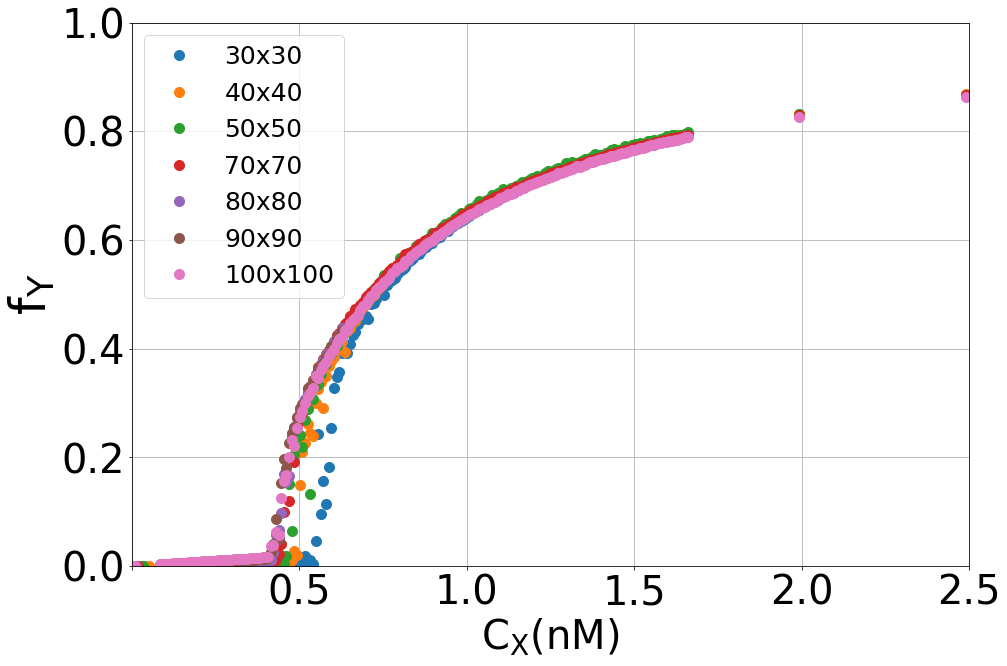

In [20]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(nrows=1,ncols=1,figure=fig, width_ratios= [1],height_ratios=[1], wspace=1,hspace=1)
#########################
ax1 = fig.add_subplot(gs[0:1, 0:1])
plt.plot(x_particle_concentration_30x30,mean_y_fraction_condensed_30x30,'o',label='30x30',markersize=10)
plt.plot(x_particle_concentration_40x40,mean_y_fraction_condensed_40x40,'o',label='40x40',markersize=10)
plt.plot(x_particle_concentration_50x50,mean_y_fraction_condensed_50x50,'o',label='50x50',markersize=10)
plt.plot(x_particle_concentration_70x70,mean_y_fraction_condensed_70x70,'o',label='70x70',markersize=10)
plt.plot(x_particle_concentration_80x80,mean_y_fraction_condensed_80x80,'o',label='80x80',markersize=10)
plt.plot(x_particle_concentration_90x90,mean_y_fraction_condensed_90x90,'o',label='90x90',markersize=10)
plt.plot(x_particle_concentration_100x100,mean_y_fraction_condensed_100x100,'o',label='100x100',markersize=10)
plt.grid()
plt.legend(fontsize=25)
plt.xlabel('$\mathregular{C_{X}(nM)}$',fontsize=40);plt.ylabel('$\mathregular{f_{Y}}$',fontsize=50)
plt.yticks(fontsize=40);plt.xticks(fontsize=40)
plt.xlim([0,2.5])
plt.ylim([0,1])
x_label_list=['','0.5','1.0','1.5','2.0','2.5'];
ax1.set_xticks([0,0.5,1,1.5,2.0,2.5]); # location in the axis to show the above ponits
ax1.set_xticklabels(x_label_list,fontsize=40)
#tight_layout()
#plt.savefig("fig3c_critical_concentration_03_10_21.png")

# PANEL d)

ready


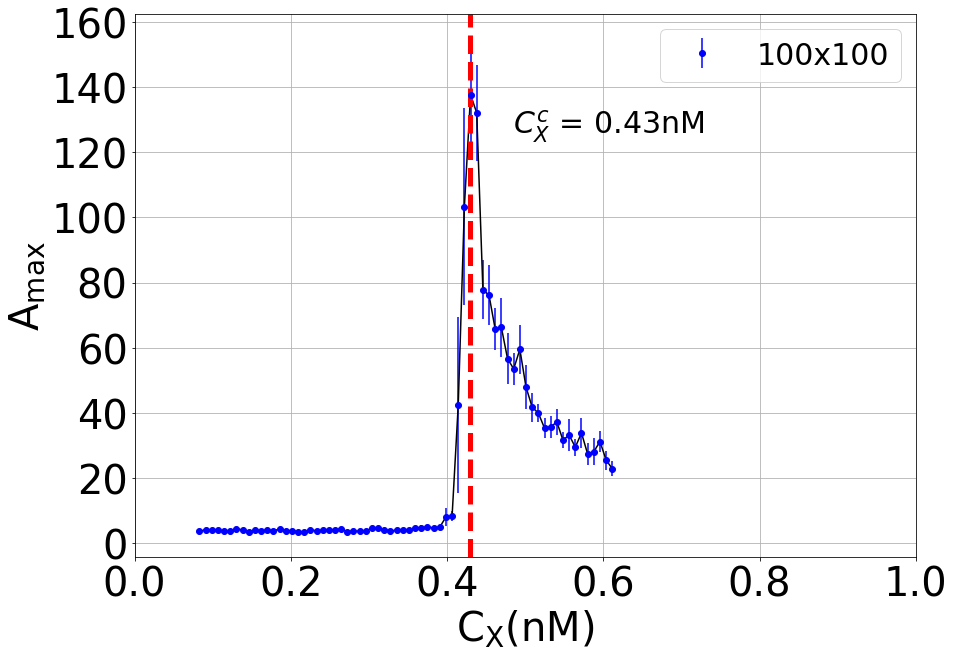

In [119]:
#dir='/media/bciezah1/USB_BASILIO/Ha/phase_separation/fig3a/ready/100x100/' # folder
dir = "/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig3/fig3d/data/100x100/"
N=np.concatenate((np.array([20,50]),np.linspace(500,10000,201)*((100*100)/(100*100)),np.array([12000,15000])*((100*100)/(100*100))),axis=0)[2:70] # space sample
startTimestep=0; endTimestep=1000 # steps
finalstep = 1000
nrep=9
startTimestep=0
max_frec_100x100=np.zeros((nrep,len(N)),dtype=float) # matrix to storage data
for replicate in range(1,nrep+1):
    count_N=-1
    for x1 in range(len(N)):                          # choose replicate
        #print(N[x1])
        count_N=count_N+1
        filename1 = dir+'output%0.2s/'%(replicate+5) +"dx2_1.0000e-12_and_k3_%0.4e_100x100.lm"%(int(N[x1]))
        #print(filename1)
        fp1 = h5py.File(filename1, "r")                         # reading file
        counts=fp1["/Simulations/%07d/SpeciesCounts"%1] # counting particles - all species
        #print(counts)
        x1_trace=counts[startTimestep:endTimestep,1]           # filter particle x1 (0) 
        #print(x1_trace)
        x1_acf=acf(x1_trace,nlags=finalstep)   # Calculate autocorrelation function
        sp=np.fft.fft(x1_acf)  #fourier transform - spectrum power
        t = np.arange(finalstep) 
        frec_index=np.where(sp.real[0:finalstep]==np.max(sp.real[0:finalstep]))
        #print(replicate-1,count_N)
        #print(frec_index)
        max_frec_100x100[replicate-1][count_N]=sp.real[frec_index][0]
        #print(sp.real[frec_index])
print("ready")

vol = (100e-06)*(100e-06)*(1e-06)*(1e+03)
Na = 6.022e+23

x_particle_concentration_100x100 = ((N/Na)/vol)*1e+09
x_particle_concnetration_mean_100x100 = np.mean(max_frec_100x100,axis=0)
figure(figsize = (14,10))
plt.errorbar(x_particle_concentration_100x100,np.mean(max_frec_100x100,axis=0),np.std(max_frec_100x100,axis=0)/sqrt(5),uplims=False,lolims=False,color='blue',fmt='o',label="100x100")
plt.plot(x_particle_concentration_100x100,x_particle_concnetration_mean_100x100,color='black')
plt.axvline(x=0.43,color='red',ls='--',lw=5)
figtext(0.50,0.75,"$C_{X}^c$ = 0.43nM ", {'ha':'left','va':'top','fontsize':30})
xlim([0,1])
plt.legend(fontsize=30)
plt.xlabel('$\mathregular{C_{X}(nM)}$',fontsize=40);plt.ylabel("$\mathregular{A_{max}}$",fontsize=40)
plt.yticks(fontsize=40);plt.xticks(fontsize=40)
plt.grid()
#plt.savefig("Supplement3d_critical_concentration_100x100_03_11_21.png")

# PANEL (E)

/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig3/fig3e/data/1.lm
39169.711059448695
ready


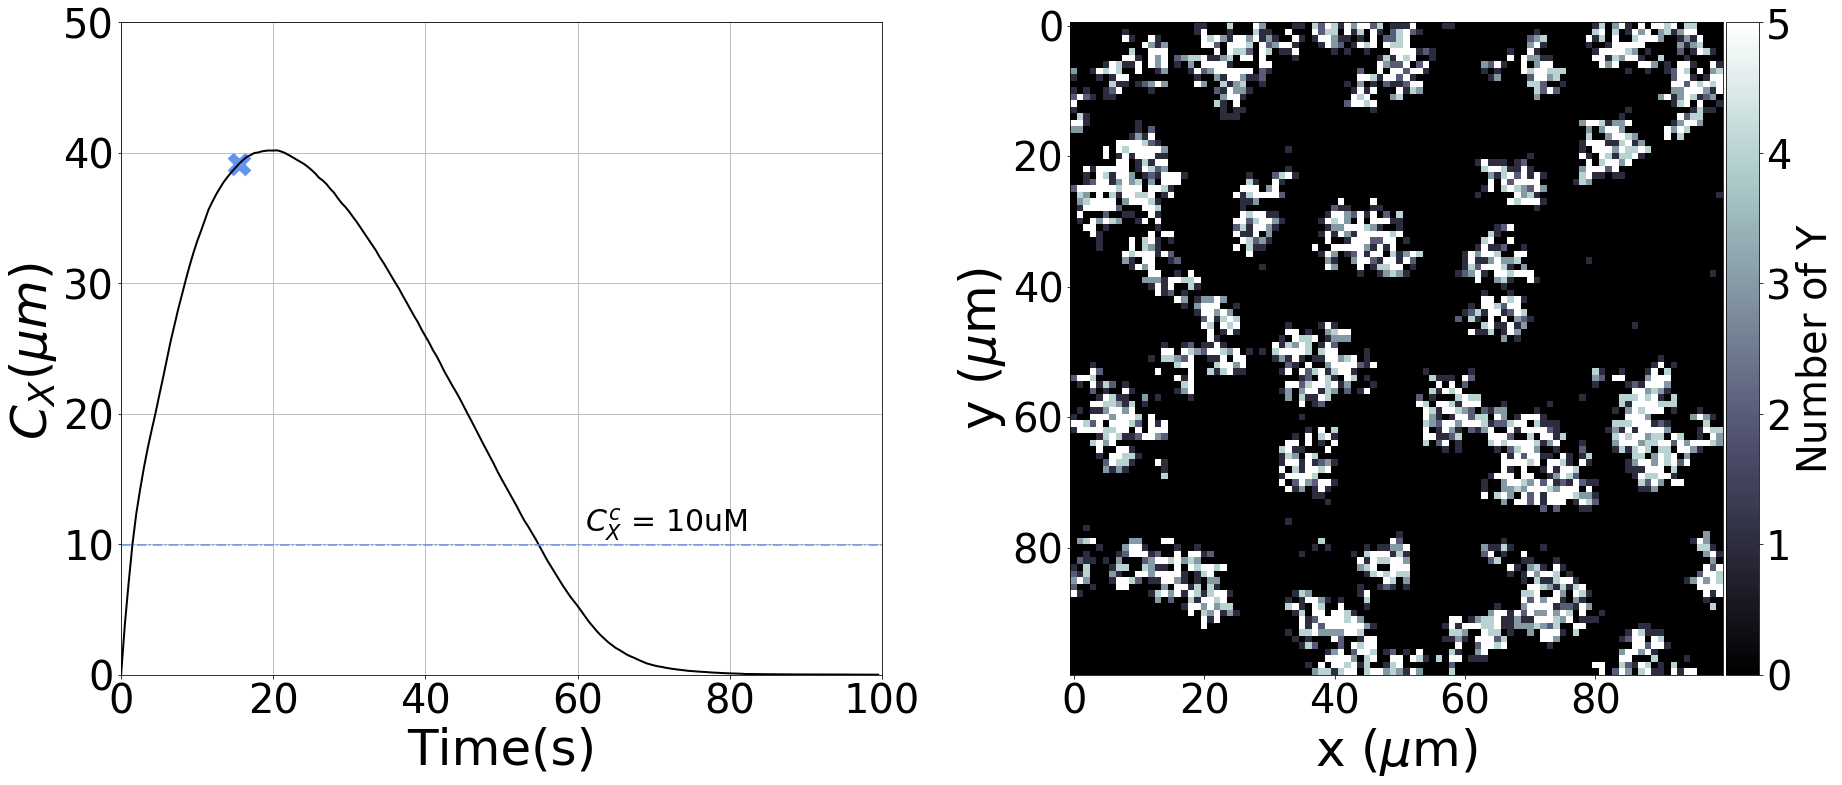

In [97]:
#dir="/media/Data/MARCC/critical-concentration/third-method/12-10-2020/k1_1.624e-05_and_2.069e-08/"
dir = '/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig3/fig3e/data/'
filename1 =dir+"1.lm"
print(filename1)
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
for replicate in range(1,2):
    for lattice in lattices:
        if  30 < int(lattice) < 32:
            lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
            counts1=np.array(fp1["/Simulations/%07d/SpeciesCounts"%replicate], dtype=double)
            times1=np.array(fp1["/Simulations/%07d/SpeciesCountTimes"%replicate], dtype=double)
            fig = plt.figure(figsize=(30,12))
            ax1 = plt.subplot(1,2,1)
            SumParticlesX2=np.sum(lfull==2,axis=3)
            TransPotSumPartX2=SumParticlesX2.transpose(2,0,1)
            
            UnitVol = 1e-06
            TotalVol = (100*UnitVol)*(100*UnitVol)*(1*UnitVol)
            TotalX = int(counts1[int(lattice):int(lattice)+1,2])+int(counts1[int(lattice):int(lattice)+1,3]*2)
            AvogNum = 6.022e+22
            TotalConc =  ((TotalX / AvogNum)/ TotalVol)
            TotConcNano = TotalConc*1e+09
            print(TotConcNano)
            plt.plot(times1[0:200],((counts1[0:200,2]+counts1[0:200,3]*2)/AvogNum/ TotalVol)*1e+06,color="black",linewidth=2)
            
            #plt.plot(times1[0:200],(counts1[0:200,2]+counts1[0:200,3]*2),color="black",linewidth=2)
            plt.axhline(y=(6008/AvogNum/ TotalVol)*1e+06,color='cornflowerblue',linestyle='-.')
            plt.scatter(times1[int(lattice):int(lattice)+1],((counts1[int(lattice):int(lattice)+1,2]+counts1[int(lattice):int(lattice)+1,3]*2)/AvogNum/TotalVol)*1e+06,color='cornflowerblue',marker='x',linewidth=25)
            plt.grid()
            plt.xlim([0,100])
            plt.ylim([0,50])
            plt.xticks(fontsize=40)
            plt.yticks(fontsize=40)
            plt.xlabel('Time(s)',fontsize=50)
            plt.ylabel('$C_{X}(\mu m)$ ',fontsize=50)
            #y_label_list=['0','5.0e+03','1.0e+04','1.5e+04','2.0e+04','2.5e+04','3.0e+04']
            figtext(0.34,0.32,"$C_{X}^c$ = 10uM ", {'ha':'left','va':'top','fontsize':30})

            #ax1.set_yticks([0,5000,10000,15000,20000,25000,30000]) # location in the axis to show the above ponits
            #ax1.set_yticklabels(y_label_list,fontsize=40)
            #figtext(0.32,0.35,'Counts$^*$ = %s'%(6008),{'ha':'left','va':'top','fontsize':30,'color':'cornflowerblue'})

            
            ax1 = plt.subplot(1,2,2)
            SumParticlesX2=np.sum(lfull==3,axis=3)
            TransPotSumPartX2=SumParticlesX2.transpose(2,0,1)
            m = ax1.imshow(TransPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone)
            plt.ylabel("y ($\mu$m)",fontsize=50); plt.xlabel("x ($\mu$m)",fontsize=50)
            plt.xticks(fontsize=40);plt.yticks(fontsize=40)
            divider = make_axes_locatable(ax1)
            cax = divider.append_axes("right",size='5%',pad=0.05)
            plt.colorbar(m,cax=cax)
            plt.yticks(fontsize=40)
            plt.ylabel('Number of $\mathregular{Y}$',fontsize=40)
            #plt.suptitle('Time =%s'%int(lattice),x=0,y=0,fontsize=30,color='red')
            #figtext(0.03,0.05,'Time =%s'%(int(lattice)),{'ha':'left','va':'top','fontsize':50,'fontweight':'bold','color':'red'})
            #savefig('img%s.png'%(int(lattice)))
            #plt.close()
print("ready")

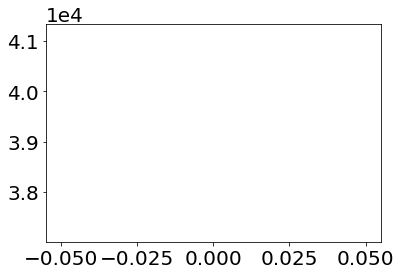

In [57]:
plt.plot(TotConcNano)

In [23]:
%pwd

'/home/bciezah1/Documents/scripts/scripts-05-19-2021/scripts'

In [32]:
#dir='/media/Data/MARCC/critical-concentration/fig4a/x1_6k/try6/fig4a/100x100/' # folder
dir = '/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig3/fig3c/100x100/'
number_of_x_particles=np.concatenate((np.array([20,50]),np.linspace(500,10000,201)*((100*100)/(100*100)),np.array([12000,15000])*((100*100)/(100*100))),axis=0)[0:205] # space sample
startTimestep=50; endTimestep=1000 # steps
nrep=linspace(1,5,5) # number of replicates
replicates_fraction_of_condensed_x_particles=np.zeros((len(nrep),len(number_of_x_particles)),dtype=float) # create matrix to save fy per replicate
for replicate in range(1,(len(nrep)+1)):
    count = -1
    for k in range(len(number_of_x_particles)):
        count = count + 1
        filename1 = dir+'output%0.1s/'%replicate +"dx2_1.0000e-12_and_k3_%0.4e_100x100.lm"%(int(number_of_x_particles[k]))
        fp1 = h5py.File(filename1, "r")
        all_particles=fp1["/Simulations/%07d/SpeciesCounts"%int(1)]
        mean_fraction_number_of_x_particles=np.mean(2*all_particles[startTimestep:endTimestep,1])/(np.mean(all_particles[startTimestep:endTimestep,0])+np.mean(2*all_particles[startTimestep:endTimestep,1]))
        replicates_fraction_of_condensed_x_particles[replicate-1][count]=mean_fraction_number_of_x_particles
mean_y_fraction_condensed_100x100 = np.mean(replicates_fraction_of_condensed_x_particles,axis =0)
vol = (100e-06)*(100e-06)*(1e-06)*(1e+03)
Na = 6.022e+23
x_particle_concentration_100x100_v2 = ((number_of_x_particles/Na)/vol)*1e+09
print('ready')

#figure(figsize = (12,8))
#plt.plot(x_particle_concentration_100x100,mean_y_fraction_condensed_100x100,'o',label='100x100',markersize=8)
#plt.legend(fontsize=15)
#plt.xlabel('$\mathregular{C(nM)}$',fontsize=30);plt.ylabel('$\mathregular{f_{Y}}$',fontsize=35)
#plt.yticks(fontsize=30);plt.xticks(fontsize=30)

ready


# FIGURE 3

/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig3/fig3ab/data/k1_3.393e-03_and_k3_1.207e-02_100x100_nuc_prod.lm
/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig3/fig3ab/data/k1_3.393e-03_and_k3_1.207e-02_100x100_nuc_prod.lm
ready
/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig3/fig3e/data/1.lm
39169.711059448695


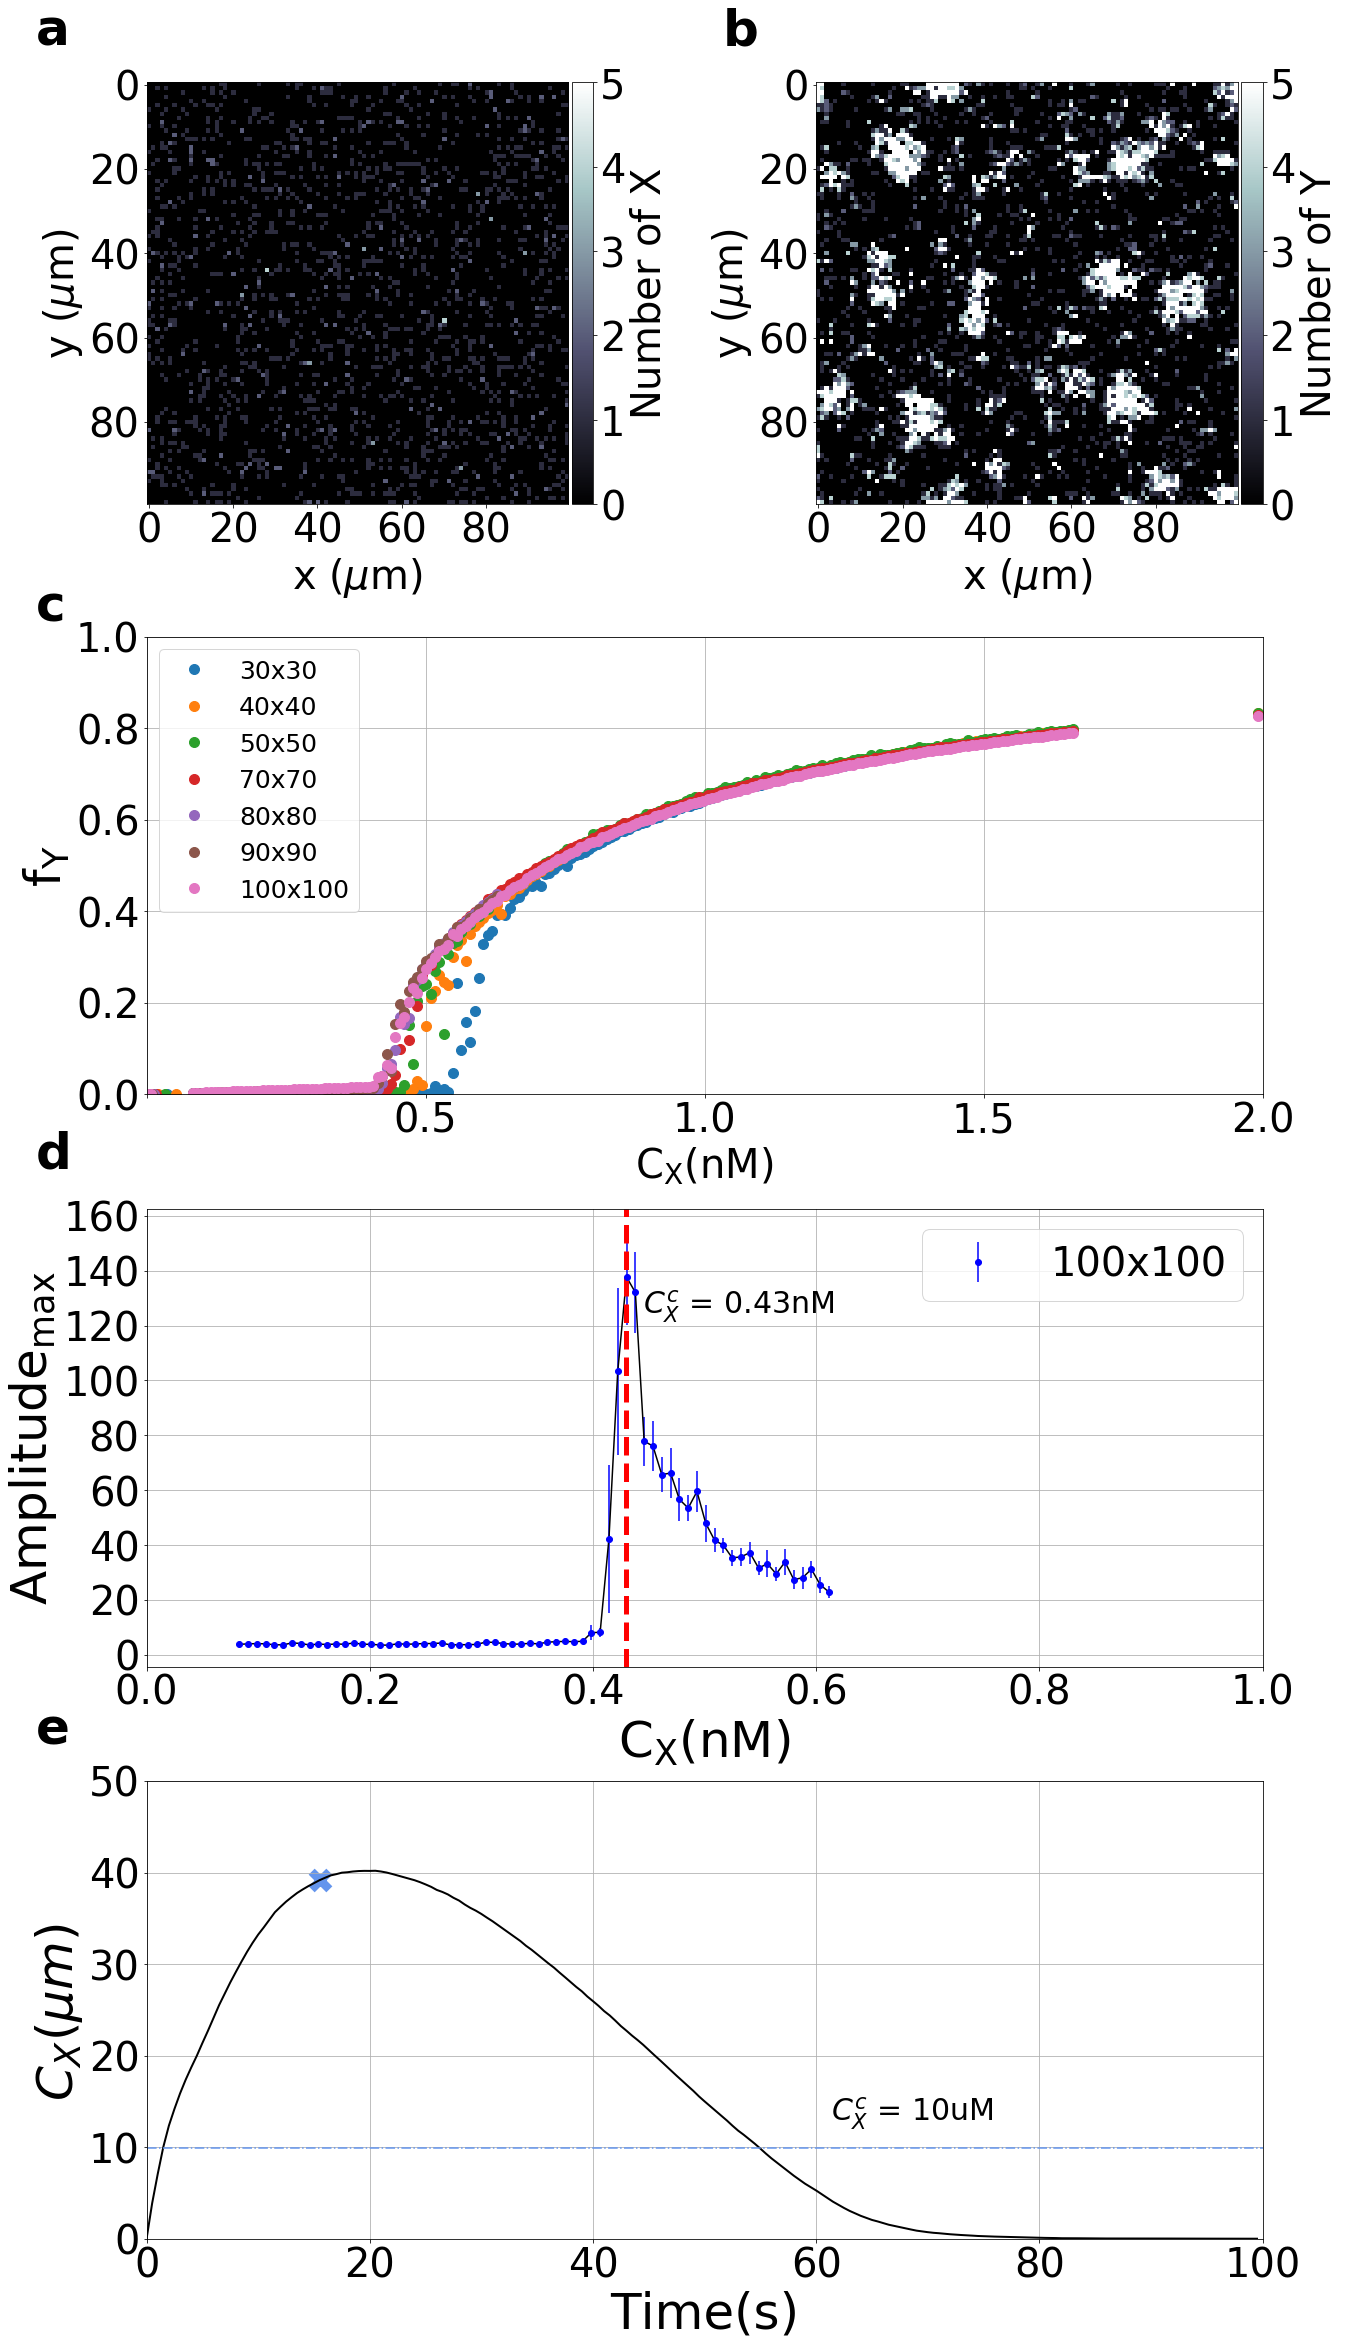

In [140]:
fig = plt.figure(figsize=(20,40))
gs = gridspec.GridSpec(nrows=4,ncols=2,figure=fig, width_ratios= [1,1],height_ratios=[1,1,1,1], wspace=0.5,hspace=0.25)
#########################
ax1 = fig.add_subplot(gs[0:1, 0:1])

dir ='/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig3/fig3ab/data/'
filename1 = dir+"k1_3.393e-03_and_k3_1.207e-02_100x100_nuc_prod.lm"
print(filename1)
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
for replicate in range(1,2):
    for lattice in lattices:
        if  250 < int(lattice) < 252:
            lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
            #fig = plt.figure(figsize=(30,12))
            #ax1 = plt.subplot(1,2,1)
            SumParticlesX2=np.sum(lfull==0,axis=3)
            TransPotSumPartX2=SumParticlesX2.transpose(2,0,1)
            m = ax1.imshow(TransPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone)
            plt.ylabel("y ($\mu$m)",fontsize=40); plt.xlabel("x ($\mu$m)",fontsize=40)
            plt.xticks(fontsize=40);plt.yticks(fontsize=40)
            divider = make_axes_locatable(ax1)
            cax = divider.append_axes("right",size='5%',pad=0.05)
            plt.colorbar(m,cax=cax)
            plt.yticks(fontsize=40)
            plt.ylabel('Number of $\mathregular{X}$',fontsize=40)
            
ax2 = fig.add_subplot(gs[0:1, 1:2])

dir ='/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig3/fig3ab/data/'
filename1 = dir+"k1_3.393e-03_and_k3_1.207e-02_100x100_nuc_prod.lm"
print(filename1)
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
for replicate in range(1,2):
    for lattice in lattices:
        if  250 < int(lattice) < 252:
            lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
            SumParticlesX2=np.sum(lfull==1,axis=3)
            TransPotSumPartX2=SumParticlesX2.transpose(2,0,1)
            m = ax2.imshow(TransPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone)
            plt.ylabel("y ($\mu$m)",fontsize=40); plt.xlabel("x ($\mu$m)",fontsize=40)
            plt.xticks(fontsize=40);plt.yticks(fontsize=40)
            divider = make_axes_locatable(ax2)
            cax = divider.append_axes("right",size='5%',pad=0.05)
            plt.colorbar(m,cax=cax)
            plt.yticks(fontsize=40)
            plt.ylabel('Number of $\mathregular{Y}$',fontsize=40)
            #plt.suptitle('Time =%s'%int(lattice),x=0,y=0,fontsize=30,color='red')
            #figtext(0.03,0.05,'Time =%s'%(600+int(lattice)),{'ha':'left','va':'top','fontsize':50,'fontweight':'bold','color':'red'})
            #savefig('img%s.png'%(600+int(lattice)))
            #plt.close()

ax3 = fig.add_subplot(gs[1:2, 0:2])

plt.plot(x_particle_concentration_30x30,mean_y_fraction_condensed_30x30,'o',label='30x30',markersize=10)
plt.plot(x_particle_concentration_40x40,mean_y_fraction_condensed_40x40,'o',label='40x40',markersize=10)
plt.plot(x_particle_concentration_50x50,mean_y_fraction_condensed_50x50,'o',label='50x50',markersize=10)
plt.plot(x_particle_concentration_70x70,mean_y_fraction_condensed_70x70,'o',label='70x70',markersize=10)
plt.plot(x_particle_concentration_80x80,mean_y_fraction_condensed_80x80,'o',label='80x80',markersize=10)
plt.plot(x_particle_concentration_90x90,mean_y_fraction_condensed_90x90,'o',label='90x90',markersize=10)
plt.plot(x_particle_concentration_100x100_v2,mean_y_fraction_condensed_100x100,'o',label='100x100',markersize=10)
#plt.plot(x_particle_concentration_100x100,mean_y_fraction_condensed_100x100,'o',label='100x100',markersize=10)
plt.grid()
plt.legend(fontsize=25)
plt.xlabel('$\mathregular{C_{X}(nM)}$',fontsize=40);plt.ylabel('$\mathregular{f_{Y}}$',fontsize=50)
plt.yticks(fontsize=40);plt.xticks(fontsize=40)
plt.xlim([0,2])
plt.ylim([0,1])
x_label_list=['','0.5','1.0','1.5','2.0'];
ax3.set_xticks([0,0.5,1,1.5,2.0]); # location in the axis to show the above ponits
ax3.set_xticklabels(x_label_list,fontsize=40)

ax4 = fig.add_subplot(gs[2:3, 0:2])

dir = "/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig3/fig3d/data/100x100/" # folder
N=np.concatenate((np.array([20,50]),np.linspace(500,10000,201)*((100*100)/(100*100)),np.array([12000,15000])*((100*100)/(100*100))),axis=0)[2:70] # space sample
startTimestep=0; endTimestep=1000 # steps
finalstep = 1000
nrep=9
startTimestep=0
max_frec_100x100=np.zeros((nrep,len(N)),dtype=float) # matrix to storage data
for replicate in range(1,nrep+1):
    count_N=-1
    for x1 in range(len(N)):                          # choose replicate
        #print(N[x1])
        count_N=count_N+1
        filename1 = dir+'output%0.2s/'%(replicate+5) +"dx2_1.0000e-12_and_k3_%0.4e_100x100.lm"%(int(N[x1]))
        #print(filename1)
        fp1 = h5py.File(filename1, "r")                         # reading file
        counts=fp1["/Simulations/%07d/SpeciesCounts"%1] # counting particles - all species
        #print(counts)
        x1_trace=counts[startTimestep:endTimestep,0]           # filter particle x1 (0) 
        #print(x1_trace)
        x1_acf=acf(x1_trace,nlags=finalstep)   # Calculate autocorrelation function
        sp=np.fft.fft(x1_acf)  #fourier transform - spectrum power
        t = np.arange(finalstep) 
        frec_index=np.where(sp.real[0:finalstep]==np.max(sp.real[0:finalstep]))
        #print(replicate-1,count_N)
        #print(frec_index)
        max_frec_100x100[replicate-1][count_N]=sp.real[frec_index][0]
        #print(sp.real[frec_index])
print("ready")

vol = (100e-06)*(100e-06)*(1e-06)*(1e+03)
Na = 6.022e+23

x_particle_concentration_100x100 = ((N/Na)/vol)*1e+09
x_particle_concnetration_mean_100x100 = np.mean(max_frec_100x100,axis=0)
#figure(figsize = (14,10))
plt.errorbar(x_particle_concentration_100x100,np.mean(max_frec_100x100,axis=0),np.std(max_frec_100x100,axis=0)/sqrt(5),uplims=False,lolims=False,color='blue',fmt='o',label="100x100")
plt.plot(x_particle_concentration_100x100,x_particle_concnetration_mean_100x100,color='black')
plt.axvline(x=0.43,color='red',ls='--',lw=5)
figtext(0.47,0.455,"$C_{X}^c$ = 0.43nM ", {'ha':'left','va':'top','fontsize':30})
xlim([0,1])
plt.legend(fontsize=40)
plt.xlabel('$\mathregular{C_{X}(nM)}$',fontsize=50);plt.ylabel("$\mathregular{Amplitude_{max}}$",fontsize=50)
plt.yticks(fontsize=40);plt.xticks(fontsize=40)
plt.grid()


ax5 = fig.add_subplot(gs[3:4, 0:2])

dir = '/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig3/fig3e/data/'
filename1 =dir+"1.lm"
print(filename1)
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
for replicate in range(1,2):
    for lattice in lattices:
        if  30 < int(lattice) < 32:
            lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
            counts1=np.array(fp1["/Simulations/%07d/SpeciesCounts"%replicate], dtype=double)
            times1=np.array(fp1["/Simulations/%07d/SpeciesCountTimes"%replicate], dtype=double)
            #fig = plt.figure(figsize=(30,12))
            #ax1 = plt.subplot(1,2,1)
            SumParticlesX2=np.sum(lfull==2,axis=3)
            TransPotSumPartX2=SumParticlesX2.transpose(2,0,1)
            
            UnitVol = 1e-06
            TotalVol = (100*UnitVol)*(100*UnitVol)*(1*UnitVol)
            TotalX = int(counts1[int(lattice):int(lattice)+1,2])+int(counts1[int(lattice):int(lattice)+1,3]*2)
            AvogNum = 6.022e+22
            TotalConc =  ((TotalX / AvogNum)/ TotalVol)
            TotConcNano = TotalConc*1e+09
            print(TotConcNano)
            plt.plot(times1[0:200],((counts1[0:200,2]+counts1[0:200,3]*2)/AvogNum/ TotalVol)*1e+06,color="black",linewidth=2)
            
            #plt.plot(times1[0:200],(counts1[0:200,2]+counts1[0:200,3]*2),color="black",linewidth=2)
            plt.axhline(y=(6000/AvogNum/ TotalVol)*1e+06,color='cornflowerblue',linestyle='-.')
            plt.scatter(times1[int(lattice):int(lattice)+1],((counts1[int(lattice):int(lattice)+1,2]+counts1[int(lattice):int(lattice)+1,3]*2)/AvogNum/TotalVol)*1e+06,color='cornflowerblue',marker='x',linewidth=25)
            plt.grid()
            plt.xlim([0,100])
            plt.ylim([0,50])
            plt.xticks(fontsize=40)
            plt.yticks(fontsize=40)
            plt.xlabel('Time(s)',fontsize=50)
            plt.ylabel('$C_{X}(\mu m)$ ',fontsize=50)
            figtext(0.60,0.175,"$C_{X}^c$ = 10uM ", {'ha':'left','va':'top','fontsize':30})
            #y_label_list=['0','5.0e+03','1.0e+04','1.5e+04','2.0e+04','2.5e+04','3.0e+04']

            #ax5.set_yticks([0,5000,10000,15000,20000,25000,30000]) # location in the axis to show the above ponits
            #ax5.set_yticklabels(fontsize=40)
            #figtext(0.75,0.17,'Counts$^*$ = %s'%(6008),{'ha':'left','va':'top','fontsize':20,'color':'cornflowerblue'})

figtext(0.048,0.900,"a", {'ha':'left','va':'top','fontsize':50, 'fontweight':'bold'})
figtext(0.525,0.900,"b", {'ha':'left','va':'top','fontsize':50, 'fontweight':'bold'})
figtext(0.048,0.700,"c", {'ha':'left','va':'top','fontsize':50, 'fontweight':'bold'})
figtext(0.048,0.510,"d", {'ha':'left','va':'top','fontsize':50, 'fontweight':'bold'})
figtext(0.048,0.310,"e", {'ha':'left','va':'top','fontsize':50, 'fontweight':'bold'})            
'''
ax6 = fig.add_subplot(gs[3:4, 1:2])

dir="/media/Data/MARCC/critical-concentration/third-method/12-10-2020/k1_1.624e-05_and_2.069e-08/"
filename1 =dir+"1.lm"
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
for replicate in range(1,2):
    for lattice in lattices:
        if  30 < int(lattice) < 32:
            lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
            counts1=np.array(fp1["/Simulations/%07d/SpeciesCounts"%replicate], dtype=double)
            times1=np.array(fp1["/Simulations/%07d/SpeciesCountTimes"%replicate], dtype=double)
            
            SumParticlesX2=np.sum(lfull==3,axis=3)
            TransPotSumPartX2=SumParticlesX2.transpose(2,0,1)
            m = ax6.imshow(TransPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone)
            plt.ylabel("y ($\mu$m)",fontsize=50); plt.xlabel("x ($\mu$m)",fontsize=50)
            plt.xticks(fontsize=40);plt.yticks(fontsize=40)
            divider = make_axes_locatable(ax6)
            cax = divider.append_axes("right",size='5%',pad=0.05)
            plt.colorbar(m,cax=cax)
            plt.yticks(fontsize=40)
            plt.ylabel('Number of $\mathregular{Y}$',fontsize=40)
'''
plt.savefig("fig3-critical-concentration.png")

/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig3/fig3e/data/1.lm
ready
ready


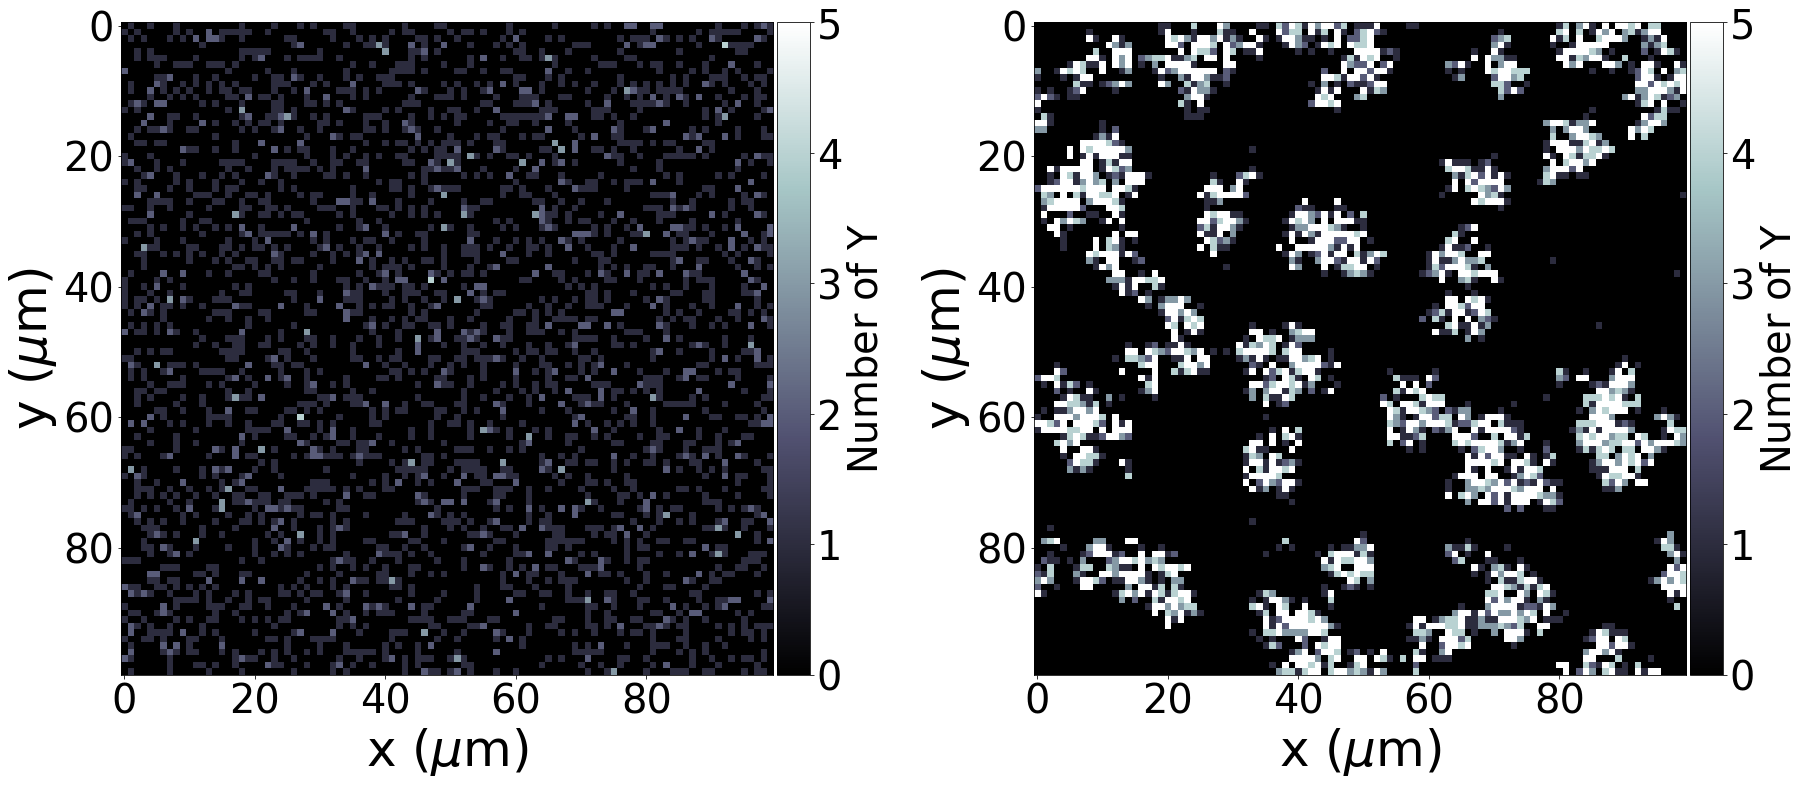

In [27]:
dir = '/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig3/fig3e/data/'
filename1 =dir+"1.lm"
print(filename1)
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
for replicate in range(1,2):
    for lattice in lattices:
        if  30 < int(lattice) < 32:
            lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
            counts1=np.array(fp1["/Simulations/%07d/SpeciesCounts"%replicate], dtype=double)
            times1=np.array(fp1["/Simulations/%07d/SpeciesCountTimes"%replicate], dtype=double)
            fig = plt.figure(figsize=(30,12))
            ax1 = plt.subplot(1,2,1)
            SumParticlesX2=np.sum(lfull==2,axis=3)
            TransPotSumPartX2=SumParticlesX2.transpose(2,0,1)
            #SumParticlesX2=np.sum(lfull==3,axis=3)
            #TransPotSumPartX2=SumParticlesX2.transpose(2,0,1)
            m = ax1.imshow(TransPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone)
            plt.ylabel("y ($\mu$m)",fontsize=50); plt.xlabel("x ($\mu$m)",fontsize=50)
            plt.xticks(fontsize=40);plt.yticks(fontsize=40)
            divider = make_axes_locatable(ax1)
            cax = divider.append_axes("right",size='5%',pad=0.05)
            plt.colorbar(m,cax=cax)
            plt.yticks(fontsize=40)
            plt.ylabel('Number of $\mathregular{Y}$',fontsize=40)
            #plt.suptitle('Time =%s'%int(lattice),x=0,y=0,fontsize=30,color='red')
            #figtext(0.03,0.05,'Time =%s'%(int(lattice)),{'ha':'left','va':'top','fontsize':50,'fontweight':'bold','color':'red'})
            #savefig('img%s.png'%(int(lattice)))
            #plt.close()
            print("ready")
            
            ax2 = plt.subplot(1,2,2)
            SumParticlesX2=np.sum(lfull==3,axis=3)
            TransPotSumPartX2=SumParticlesX2.transpose(2,0,1)
            m = ax2.imshow(TransPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone)
            plt.ylabel("y ($\mu$m)",fontsize=50); plt.xlabel("x ($\mu$m)",fontsize=50)
            plt.xticks(fontsize=40);plt.yticks(fontsize=40)
            divider = make_axes_locatable(ax2)
            cax = divider.append_axes("right",size='5%',pad=0.05)
            plt.colorbar(m,cax=cax)
            plt.yticks(fontsize=40)
            plt.ylabel('Number of $\mathregular{Y}$',fontsize=40)
            #plt.suptitle('Time =%s'%int(lattice),x=0,y=0,fontsize=30,color='red')
            #figtext(0.03,0.05,'Time =%s'%(int(lattice)),{'ha':'left','va':'top','fontsize':50,'fontweight':'bold','color':'red'})
            #savefig('img%s.png'%(int(lattice)))
            #plt.close()
#savefig('figure3e_inset1_05_13_2021.png')
print("ready")

/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig3/fig3e/data/1.lm
ready
ready


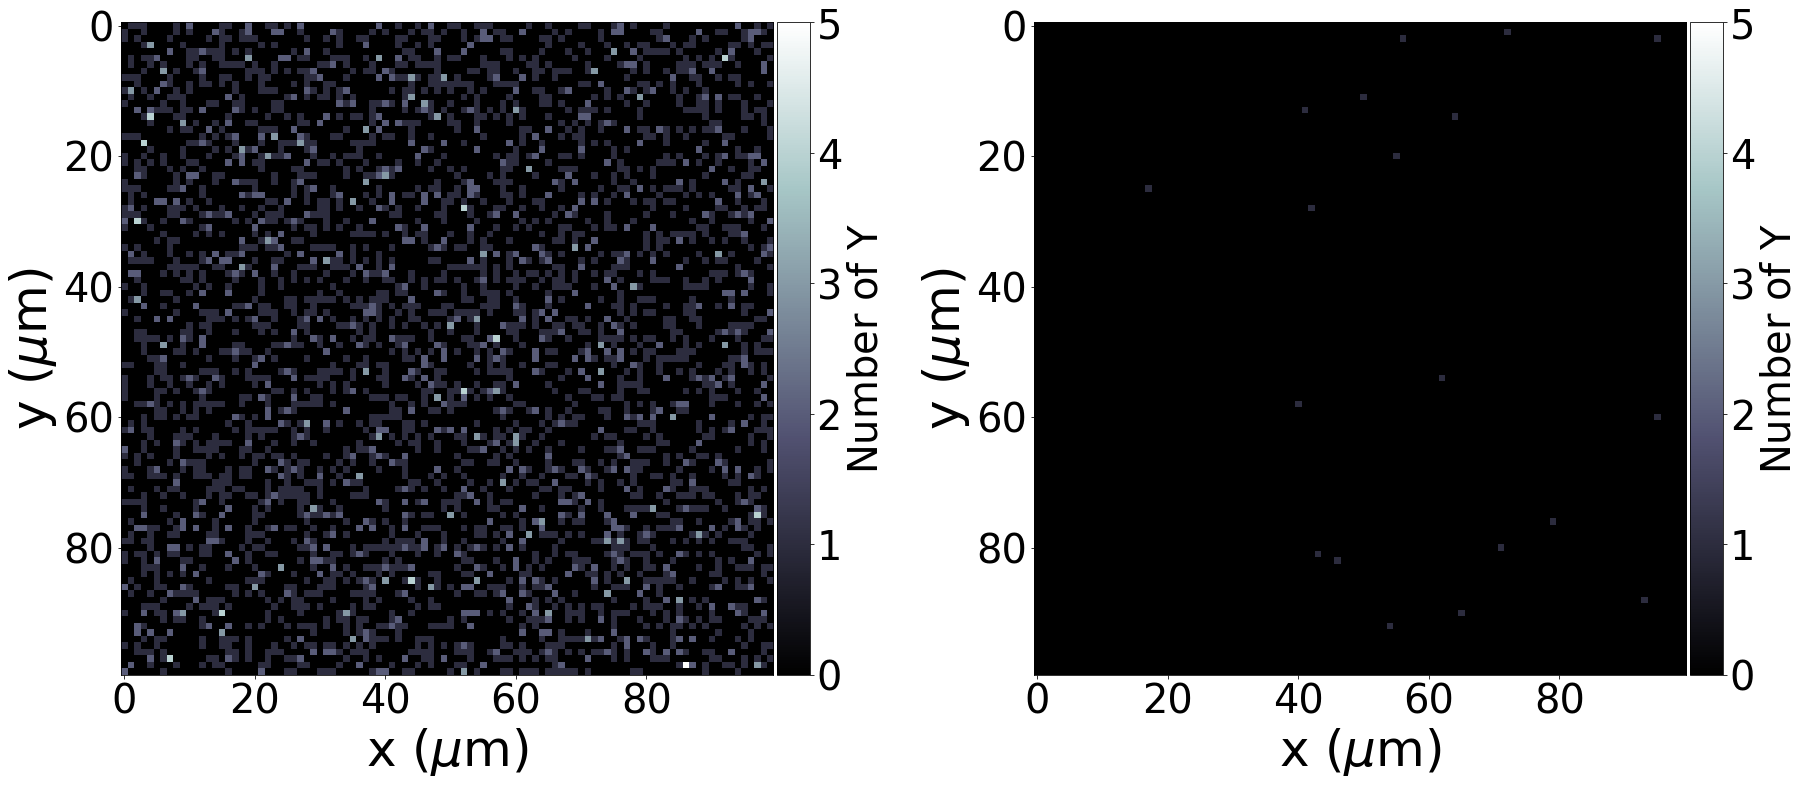

In [28]:
#dir="/media/Data/MARCC/critical-concentration/third-method/12-10-2020/k1_1.624e-05_and_2.069e-08/" #this are the 
# values of k1 and k3
dir = '/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig3/fig3e/data/'
filename1 =dir+"1.lm"
print(filename1)
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
for replicate in range(1,2):
    for lattice in lattices:
        if  1 < int(lattice) < 3:
            lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
            counts1=np.array(fp1["/Simulations/%07d/SpeciesCounts"%replicate], dtype=double)
            times1=np.array(fp1["/Simulations/%07d/SpeciesCountTimes"%replicate], dtype=double)
            fig = plt.figure(figsize=(30,12))
            ax1 = plt.subplot(1,2,1)
            SumParticlesX2=np.sum(lfull==2,axis=3)
            TransPotSumPartX2=SumParticlesX2.transpose(2,0,1)
            #SumParticlesX2=np.sum(lfull==3,axis=3)
            #TransPotSumPartX2=SumParticlesX2.transpose(2,0,1)
            m = ax1.imshow(TransPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone)
            plt.ylabel("y ($\mu$m)",fontsize=50); plt.xlabel("x ($\mu$m)",fontsize=50)
            plt.xticks(fontsize=40);plt.yticks(fontsize=40)
            divider = make_axes_locatable(ax1)
            cax = divider.append_axes("right",size='5%',pad=0.05)
            plt.colorbar(m,cax=cax)
            plt.yticks(fontsize=40)
            plt.ylabel('Number of $\mathregular{Y}$',fontsize=40)
            #plt.suptitle('Time =%s'%int(lattice),x=0,y=0,fontsize=30,color='red')
            #figtext(0.03,0.05,'Time =%s'%(int(lattice)),{'ha':'left','va':'top','fontsize':50,'fontweight':'bold','color':'red'})
            #savefig('img%s.png'%(int(lattice)))
            #plt.close()
            print("ready")
            
            ax2 = plt.subplot(1,2,2)
            SumParticlesX2=np.sum(lfull==3,axis=3)
            TransPotSumPartX2=SumParticlesX2.transpose(2,0,1)
            m = ax2.imshow(TransPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone)
            plt.ylabel("y ($\mu$m)",fontsize=50); plt.xlabel("x ($\mu$m)",fontsize=50)
            plt.xticks(fontsize=40);plt.yticks(fontsize=40)
            divider = make_axes_locatable(ax2)
            cax = divider.append_axes("right",size='5%',pad=0.05)
            plt.colorbar(m,cax=cax)
            plt.yticks(fontsize=40)
            plt.ylabel('Number of $\mathregular{Y}$',fontsize=40)
            #plt.suptitle('Time =%s'%int(lattice),x=0,y=0,fontsize=30,color='red')
            #figtext(0.03,0.05,'Time =%s'%(int(lattice)),{'ha':'left','va':'top','fontsize':50,'fontweight':'bold','color':'red'})
            #savefig('img%s.png'%(int(lattice)))
            #plt.close()
savefig('figure3e_inset2_05_13_2021.png')
print("ready")

In [11]:
#dir="/media/Data/MARCC/critical-concentration/third-method/12-10-2020/k1_1.624e-05_and_2.069e-08/"
dir = '/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig3/fig3e/data/'
filename1 =dir+"1.lm"
print(filename1)
fp1 = h5py.File(filename1, "r")
replicate=1
lattices=fp1["/Simulations/%07d/Lattice"%replicate].keys()
for replicate in range(1,2):
    for lattice in lattices:
        if  30 < int(lattice) < 32:
            lfull = np.array(fp1["/Simulations/%07d/Lattice/%s"%(replicate,lattice)], dtype=np.uint8)
            counts1=np.array(fp1["/Simulations/%07d/SpeciesCounts"%replicate], dtype=double)
            times1=np.array(fp1["/Simulations/%07d/SpeciesCountTimes"%replicate], dtype=double)
            fig = plt.figure(figsize=(30,12))
            ax1 = plt.subplot(1,2,1)
            SumParticlesX2=np.sum(lfull==2,axis=3)
            TransPotSumPartX2=SumParticlesX2.transpose(2,0,1)
            
            UnitVol = 1e-06
            TotalVol = (100*UnitVol)*(100*UnitVol)*(1*UnitVol)
            TotalX = int(counts1[int(lattice):int(lattice)+1,2])+int(counts1[int(lattice):int(lattice)+1,3]*2)
            AvogNum = 6.022e+22
            TotalConc =  ((TotalX / AvogNum)/ TotalVol)
            TotConcNano = TotalConc*1e+09
            print(TotConcNano)
            plt.plot(times1[0:200],((counts1[0:200,2]+counts1[0:200,3]*2)/AvogNum/ TotalVol)*1e+06,color="black",linewidth=2)
            
            #plt.plot(times1[0:200],(counts1[0:200,2]+counts1[0:200,3]*2),color="black",linewidth=2)
            plt.axhline(y=(6008/AvogNum/ TotalVol)*1e+06,color='cornflowerblue',linestyle='-.')
            plt.scatter(times1[int(lattice):int(lattice)+1],((counts1[int(lattice):int(lattice)+1,2]+counts1[int(lattice):int(lattice)+1,3]*2)/AvogNum/TotalVol)*1e+06,color='cornflowerblue',marker='x',linewidth=25)
            plt.grid()
            plt.xlim([0,100])
            plt.ylim([0,50])
            plt.xticks(fontsize=40)
            plt.yticks(fontsize=40)
            plt.xlabel('Time(s)',fontsize=50)
            plt.ylabel('$C_{X}(\mu m)$ ',fontsize=50)
            #y_label_list=['0','5.0e+03','1.0e+04','1.5e+04','2.0e+04','2.5e+04','3.0e+04']
            figtext(0.34,0.32,"$C_{X}^c$ = 10uM ", {'ha':'left','va':'top','fontsize':30})

            #ax1.set_yticks([0,5000,10000,15000,20000,25000,30000]) # location in the axis to show the above ponits
            #ax1.set_yticklabels(y_label_list,fontsize=40)
            #figtext(0.32,0.35,'Counts$^*$ = %s'%(6008),{'ha':'left','va':'top','fontsize':30,'color':'cornflowerblue'})

            
            ax1 = plt.subplot(1,2,2)
            SumParticlesX2=np.sum(lfull==3,axis=3)
            TransPotSumPartX2=SumParticlesX2.transpose(2,0,1)
            m = ax1.imshow(TransPotSumPartX2[0],interpolation='nearest',vmin=0, vmax=5,cmap=cm.bone)
            plt.ylabel("y ($\mu$m)",fontsize=50); plt.xlabel("x ($\mu$m)",fontsize=50)
            plt.xticks(fontsize=40);plt.yticks(fontsize=40)
            divider = make_axes_locatable(ax1)
            cax = divider.append_axes("right",size='5%',pad=0.05)
            plt.colorbar(m,cax=cax)
            plt.yticks(fontsize=40)
            plt.ylabel('Number of $\mathregular{Y}$',fontsize=40)
            #plt.suptitle('Time =%s'%int(lattice),x=0,y=0,fontsize=30,color='red')
            #figtext(0.03,0.05,'Time =%s'%(int(lattice)),{'ha':'left','va':'top','fontsize':50,'fontweight':'bold','color':'red'})
            #savefig('img%s.png'%(int(lattice)))
            #plt.close()
print("ready")

/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig3/fig3e/data/1.lm


OSError: Unable to open file (unable to open file: name = '/media/bciezah1/USB_BASILIO/Ha/phase_separation/paper/figures/fig3/fig3e/data/1.lm', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)